<a href="https://colab.research.google.com/github/yuanxzMST/Coursework/blob/main/hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Homework 5

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [85]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.integrate import odeint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from keras.callbacks import Callback

# Custom activation function
from keras.layers import Activation
from tensorflow.keras import backend as K
from keras.utils.generic_utils import get_custom_objects

# **Problem 1** (Example 1.1.2)


In [ ]:
# generate the input
x1,x2 = np.meshgrid(np.linspace(-2,2,50),np.linspace(-2,2,50))
X = np.vstack((x1.flatten(),x2.flatten())).T

Text(0.5, 0.92, 'Sigmoid')

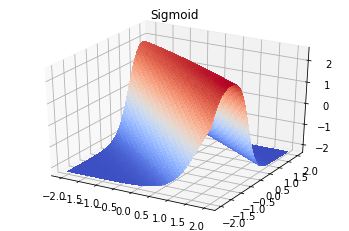

In [ ]:
# define the neural network model with sigmoid function
model = Sequential([
                    Dense(2,input_dim = 2, activation='sigmoid'),
                    Dense(1,activation='linear')
])

# set the weights as given
W = [np.array([[-2.69,-2.80], [-3.39,-4.56]]),np.array([-2.21,4.76])]
V = [np.array([[-4.91],[4.95]]),np.array([-2.28])]
model.layers[0].set_weights(W)
model.layers[1].set_weights(V)

# run the model and generate the output
y = model.predict(X)

# plot
fig1 = plt.figure()
ax1 = fig1.gca(projection='3d')

# Plot the surface.
Y = y.reshape(x1.shape)
surf = ax1.plot_surface(x1, x2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax1.set_title('Sigmoid')

Text(0.5, 0.92, 'tanh')

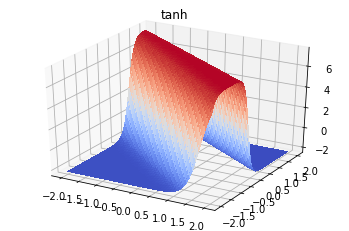

In [ ]:
# define the neural network model with tanh function
model = Sequential([
                    Dense(2,input_dim = 2, activation='tanh'),
                    Dense(1,activation='linear')
])

# set the weights as given
W = [np.array([[-2.69,-2.80], [-3.39,-4.56]]),np.array([-2.21,4.76])]
V = [np.array([[-4.91],[4.95]]),np.array([-2.28])]
model.layers[0].set_weights(W)
model.layers[1].set_weights(V)

# run the model and generate the output
y = model.predict(X)

# plot
fig2 = plt.figure()
ax2 = fig2.gca(projection='3d')

# Plot the surface.
Y = y.reshape(x1.shape)
surf = ax2.plot_surface(x1, x2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax2.set_title('tanh')

# **Problem 2** (Example 1.1.3)

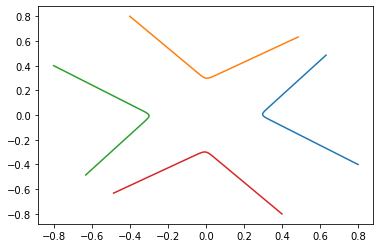

In [ ]:
# define hopfield function
def hopfield(x,t):
  g = 100
  tau = 2
  u = np.array([[0],[0]])
  w = np.array([[0,1],[1,0]])
  xi = np.divide(1-np.exp(-g*x.reshape(2,1)),1+np.exp(-g*x.reshape(2,1)))
  xdot = (-x.reshape(2,1)+np.dot(w,xi)+u)/tau
  return np.squeeze(np.asarray(xdot))

# try 4 different initional conditions
x0 = np.array([0.8,-0.4])
x1 = np.array([-0.4,0.8])
x2 = np.array([-0.8,0.4])
x3 = np.array([0.4,-0.8])
t = np.linspace(-1, 1, 1000)
sol0 = odeint(hopfield, x0, t)
sol1 = odeint(hopfield, x1, t)
sol2 = odeint(hopfield, x2, t)
sol3 = odeint(hopfield, x3, t)

# plot the phase-plane trajectory plot of Hopfield Net
fig3 = plt.figure()
ax3 = fig3.add_subplot(1, 1, 1)
ax3.plot(sol0[:,0],sol0[:,1])
ax3.plot(sol1[:,0],sol1[:,1])
ax3.plot(sol2[:,0],sol2[:,1])
ax3.plot(sol3[:,0],sol3[:,1])


It can be seen that the from 4 different initial conditions [0.8,-0.4], [-0.4,0.8], [-0.8,0.4], [0.4,-0.8], the phase-plane plot is similiar to the given plot in the example.

# **Problem 3** (Example 1.1.4)



In [52]:
# define the discrete Hopfield Network

class DiscreteHopfield:
  def __init__(self,a,w,v,u,n,x1,x2):
    '''
    a - A matrix of system
    w - NN weight
    v - V matrix of system
    u - state variables
    n - iteration times N
    x1,x2 - initial values, float
    '''
    self.A = a
    self.W = w
    self.V = v
    self.U = u
    self.N = n
    self.X1 = x1
    self.X2 = x2

  def HopfieldNN(self):
    x = np.empty((0,2),float)
    x = np.append(x,np.array([[self.X1, self.X2]]), axis = 0)
    a00 = self.A[0,0]; a01 = self.A[0,1]
    a10 = self.A[1,0]; a11 = self.A[1,1]
    w00 = self.W[0,0]; w01 = self.W[0,1]
    w10 = self.W[1,0]; w11 = self.W[1,1]
    u0 = self.U[0]; u1 = self.U[1]
    v00 = self.V[0,0]; v01 = self.V[0,1]
    v10 = self.V[1,0]; v11 = self.V[1,1]

    for i in range(self.N):
      tempx1 = a00*x[i,0]+a01*x[i,1]+w00*np.tanh(v00*x[i,0])+w01*np.tanh(v01*x[i,1])+self.U[0]
      tempx2 = a10*x[i,0]+a11*x[i,1]+w10*np.tanh(v10*x[i,0])+w11*np.tanh(v11*x[i,1])+self.U[1]
      x = np.append(x,np.array([[tempx1, tempx2]]), axis = 0)
    return x

  def plotfig(self,xout):
    figx = plt.figure()
    axx = figx.add_subplot(1,1,1)
    axx.scatter(xout[:,0],xout[:,1])

    return axx

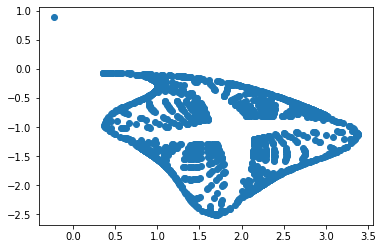

In [53]:
# initialize parameters
a = np.array([[-0.1,1],[-1,0.1]])
w = np.array([[np.pi,1],[1,-1]])
v = np.array([[1.23456,2.23456],[1.23456,2.23456]])
u = np.array([1,-1])
n = 2000; x1 = -np.random.random(1)[0]; x2 = np.random.random(1)[0]

hopfieldnn1 = DiscreteHopfield(a,w,v,u,n,x1,x2)
xout = hopfieldnn1.HopfieldNN()
hopfieldnn1.plotfig(xout)

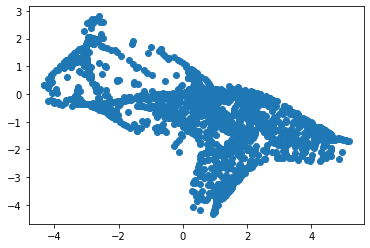

In [54]:
# initialize parameters
a = np.array([[-0.1,1],[-1,0.1]])
w = np.array([[np.pi,1],[1,-1]])
v = np.array([[2,3],[2,3]])
u = np.array([1,-1])
n = 2000; x1 = -np.random.random(1)[0]; x2 = np.random.random(1)[0]

hopfieldnn1 = DiscreteHopfield(a,w,v,u,n,x1,x2)
xout = hopfieldnn1.HopfieldNN()
hopfieldnn1.plotfig(xout)

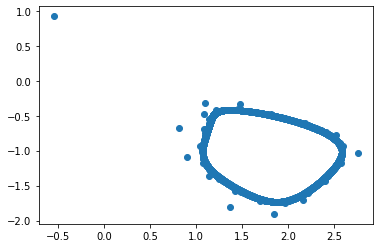

In [55]:
# initialize parameters
a = np.array([[-0.1,1],[-1,0.1]])
w = np.array([[np.pi,1],[1,-1]])
v = np.array([[1,2],[1,2]])
u = np.array([1,-1])
n = 2000; x1 = -np.random.random(1)[0]; x2 = np.random.random(1)[0]

hopfieldnn1 = DiscreteHopfield(a,w,v,u,n,x1,x2)
xout = hopfieldnn1.HopfieldNN()
hopfieldnn1.plotfig(xout)

# **Problem 4** (Example 1.3.2)

In [118]:
# train a single layer NN for simple classification
# def hardlim(x):
#   return (K.sigmoid(x*5000))

def binary_activation(x):
  cond = K.less(x, K.zeros(tf.shape(x)))
  out = K.switch(cond, K.zeros(K.shape(x)), K.ones(K.shape(x)))
  return out

# get_custom_objects().update({'binary_activation': Activation(binary_activation)})

class singleNN:

  def __init__(self,trainx,trainy):
    self.X = trainx
    self.y = trainy
  
  def trainModel(self):
    get_custom_objects().update({'binary_activation': Activation(binary_activation)})
    model = Sequential([
                        Dense(2,input_dim = 2) #, activation='sigmoid')
    ])
    model.add(Activation(binary_activation, name='SpecialActivation'))
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    mc = tf.keras.callbacks.ModelCheckpoint('weights{epoch:08d}.h5', 
                                         save_weights_only=True, save_freq='epoch')
    model.fit(self.X, self.y, epochs=20, batch_size=10, callbacks=[mc])
    return model
  
inp = np.array([[0.1,1.2],[0.7,1.8],[0.8,1.6],[0.8,0.6],[1.0,0.8],
                [0.3,0.5],[0.0,0.2],[-0.3,0.8],[-0.5,-1.5],[-1.5,-1.3]])
tar = np.array([[1,0],[1,0],[1,0],[0,0],[0,0],
                [1,1],[1,1],[1,1],[0,1],[0,1]])

nnmodel = singleNN(inp,tar)
model = nnmodel.trainModel()
model.predict(inp)

In [160]:
class singleNN:

  def __init__(self,trainx,trainy):
    self.X = trainx
    self.y = trainy
  
  def trainModel(self):
    model = Sequential([
                        Dense(2,input_dim = 2, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    mc = tf.keras.callbacks.ModelCheckpoint('weights{epoch:08d}.h5', 
                                         save_weights_only=True, save_freq='epoch')
    model.fit(self.X, self.y, epochs=20, batch_size=10, callbacks=[mc])
    return model
  
inp = np.array([[0.1,1.2],[0.7,1.8],[0.8,1.6],[0.8,0.6],[1.0,0.8],
                [0.3,0.5],[0.0,0.2],[-0.3,0.8],[-0.5,-1.5],[-1.5,-1.3]])
tar = np.array([[1,0],[1,0],[1,0],[0,0],[0,0],
                [1,1],[1,1],[1,1],[0,1],[0,1]])

nnmodel = singleNN(inp,tar)
model = nnmodel.trainModel()
model.predict(inp)

Epoch 1/20
1/1 [==============================] - 0s 13ms/step - loss: 0.2426 - mse: 0.2426
Epoch 2/20
1/1 [==============================] - 0s 9ms/step - loss: 0.2423 - mse: 0.2423
Epoch 3/20
1/1 [==============================] - 0s 8ms/step - loss: 0.2420 - mse: 0.2420
Epoch 4/20
1/1 [==============================] - 0s 8ms/step - loss: 0.2417 - mse: 0.2417
Epoch 5/20
1/1 [==============================] - 0s 8ms/step - loss: 0.2414 - mse: 0.2414
Epoch 6/20
1/1 [==============================] - 0s 8ms/step - loss: 0.2411 - mse: 0.2411
Epoch 7/20
1/1 [==============================] - 0s 8ms/step - loss: 0.2407 - mse: 0.2407
Epoch 8/20
1/1 [==============================] - 0s 7ms/step - loss: 0.2404 - mse: 0.2404
Epoch 9/20
1/1 [==============================] - 0s 8ms/step - loss: 0.2401 - mse: 0.2401
Epoch 10/20
1/1 [==============================] - 0s 8ms/step - loss: 0.2398 - mse: 0.2398
Epoch 11/20
1/1 [==============================] - 0s 7ms/step - loss: 0.2395 - mse: 0.2

array([[0.51634616, 0.46457028],
       [0.4102044 , 0.4000352 ],
       [0.38546312, 0.39722365],
       [0.36061496, 0.42315644],
       [0.3283761 , 0.40188515],
       [0.45683765, 0.46673718],
       [0.51029456, 0.4996082 ],
       [0.5868827 , 0.50840366],
       [0.5672804 , 0.58578366],
       [0.7525958 , 0.65854955]], dtype=float32)

**Tensorflow has no built-in hardlim activation function. I tried to customize it but failed. The output above is based on the sigmoid function.**

# **Problem 5** (Example 1.3.3)

In [145]:
# define the NN regression model
class nnRegression:
  
  def __init__(self,x,y,epo):
    self.X = x
    self.y = y
    self.train_epoch = epo
  
  def train_nn(self):
    model = Sequential([
                        Dense(5,input_dim = 1, activation='sigmoid'),
                        Dense(1,activation='linear')
    ])
    model.compile(tf.optimizers.Adam(learning_rate=0.1), loss='mse')
    model.fit(self.X,self.y,epochs = self.train_epoch)
    return model

  def plotfigure(self,inp,outx):
    figx = plt.figure()
    axx = figx.add_subplot(1,1,1)
    axx.scatter(self.X,self.y, marker='o')
    axx.plot(inp,outx)
    axx.set_title('epoch is {}'.format(self.train_epoch))

    return axx

In [ ]:
# generate the input
p = np.linspace(-1,1,21)
t = np.array([-0.960,-0.577,-0.073,0.377,0.641,0.660,0.461,0.134,-0.201,-0.434,
              -0.500,-0.393,-0.165,0.099,0.307,0.396,0.345,0.182,-0.031,-0.219,
              -0.320])
epos = 1
regressor1 = nnRegression(p,t,epos)
model = regressor1.train_nn()
newp = np.linspace(-1,1,101)
newy = model.predict(newp)

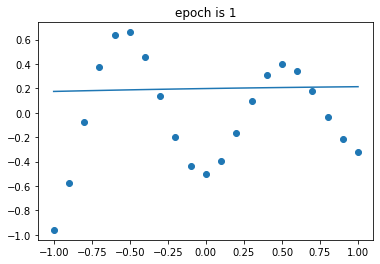

In [147]:
regressor1.plotfigure(newp,newy)

In [ ]:
epos = 150
regressor1 = nnRegression(p,t,epos)
model = regressor1.train_nn()
newy = model.predict(newp)

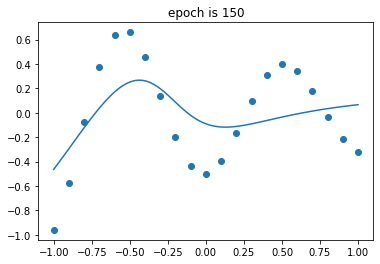

In [159]:
regressor1.plotfigure(newp,newy)

In [ ]:
epos = 300
regressor1 = nnRegression(p,t,epos)
model = regressor1.train_nn()
newy = model.predict(newp)

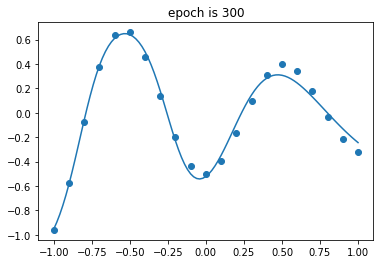

In [151]:
regressor1.plotfigure(newp,newy)

In [ ]:
epos = 800
regressor1 = nnRegression(p,t,epos)
model = regressor1.train_nn()
newy = model.predict(newp)

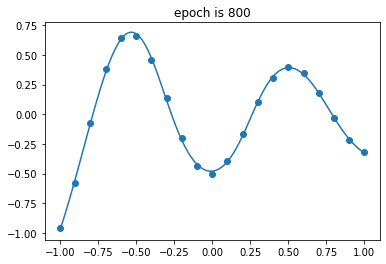

In [153]:
regressor1.plotfigure(newp,newy)